# Implementing the Gradient Descent Algorithm

**AIM**: Implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Some helper functions for plotting and drawing lines
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

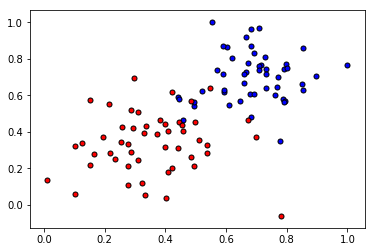

In [2]:
# read basic data from data.csv and plot 
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

### Defining the functions

**Sigmoid activation function**:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$


In [7]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**Softmax function: **
* The softmax function, is the equivalent of the sigmoid function, but when the problem has 3 or more classes the problem here only has two so the sigmoid activation function is all we need. 
* In formal terms it is a generalization of the logistic function that squashes a K-dimensional vector z of arbitrary values to  K-dimensional vector of real values where each entry is in the range (0,1) and all the entries add up to 1. 

In Python this would be something like:

In [15]:
# import NumPy library
import numpy as np

Z = [1,2,3]

#Define softmax function
softmax = lambda x : np.exp(x)/np.sum(np.exp(x))

# Print softmax of Z
print(softmax(Z))

[0.09003057 0.24472847 0.66524096]


- **Output (prediction) formula**:

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

In [16]:
# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

- **Error function**:

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$


In [10]:
# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

- **The function that updates the weights**:

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [11]:
# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

## Training function

This function will iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [12]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            # Error (log loss) step
            error = error_formula(y, output)
            # Gradient descent step
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. **The final one is in black**.
- A plot of the error function. 


========== Epoch 0 ==========
Train loss:  0.6619731146290033
Accuracy:  0.62

========== Epoch 20 ==========
Train loss:  0.5303860888972776
Accuracy:  0.78

========== Epoch 40 ==========
Train loss:  0.44556544090744593
Accuracy:  0.88

========== Epoch 60 ==========
Train loss:  0.3892960287860786
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.34972792464141306
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  0.3205283726125808
Accuracy:  0.93

========== Epoch 120 ==========
Train loss:  0.2981354286242361
Accuracy:  0.93

========== Epoch 140 ==========
Train loss:  0.28042805582111624
Accuracy:  0.93

========== Epoch 160 ==========
Train loss:  0.2660758429024682
Accuracy:  0.93

========== Epoch 180 ==========
Train loss:  0.25420596929207484
Accuracy:  0.93


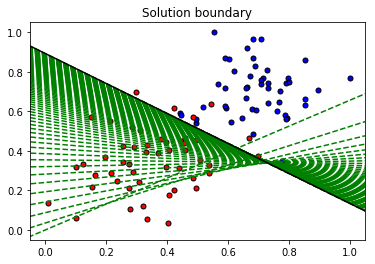

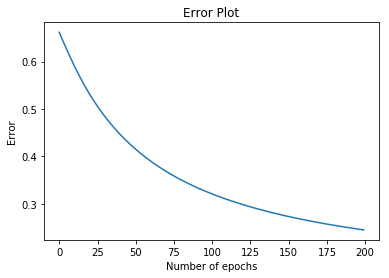

In [14]:
train(X, y, epochs, learnrate, True)